# Matplotlib Tutorial

A library for creating plots in python.

## Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Line Plots

Used to display information as a series of data points connected by straight lines.

We will be using `plt.subplots` function to create plots. This can also be used to plot multiple plots in a single figure.

In [11]:
## Signature of plt.subplots function

plt.subplots?

### Sin Wave

# Create a figure and axis
fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot y = sin(x) on the ax object
ax.plot(x, y)

### Adding Label, Title and Grid

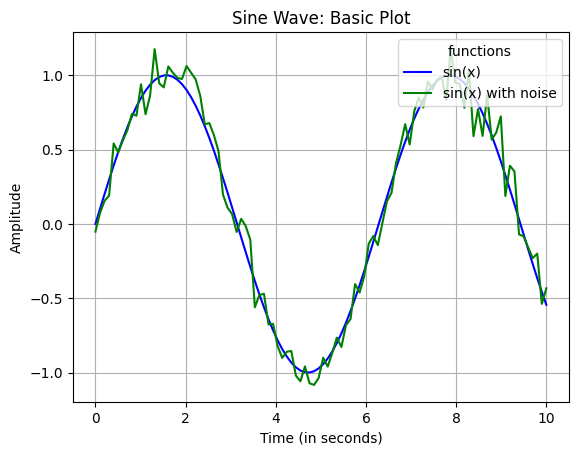

In [44]:
# Create a figure and axis
fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot y = sin(x) on the ax object
ax.plot(x, y, label="sin(x)", color="b")
ax.plot(x, np.sin(x)+np.random.randn(len(x))*0.1,label="sin(x) with noise", color='g')

# Add title and labels
ax.set_title("Sine Wave: Basic Plot")
ax.set_xlabel("Time (in seconds)")
ax.set_ylabel("Amplitude")
ax.legend(loc="upper right", title="functions")
# Add grid for better visibility of the plot
ax.grid(True)

## Organizing The Plots

### Multiple plots on the same figure

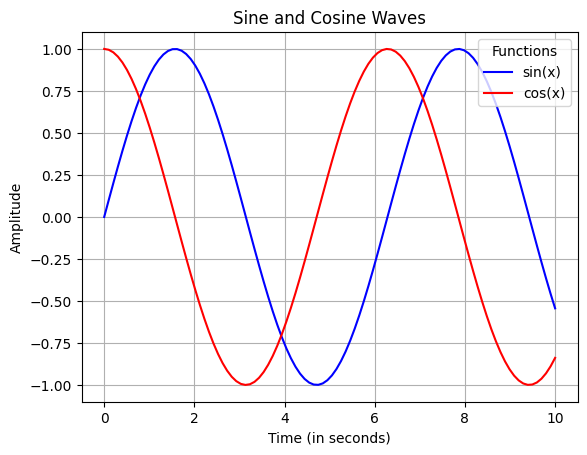

In [13]:
# Create a figure and axis
fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Plot y = sin(x) on the ax object with label
ax.plot(x, y1, label="sin(x)", color='b')

# Plot y = cos(x) on the ax object with label corresponding to same x values
ax.plot(x, y2, label="cos(x)",color='r')

# Add title and labels
ax.set_title("Sine and Cosine Waves")
ax.set_xlabel("Time (in seconds)")
ax.set_ylabel("Amplitude")

# Add legend to distinguish the curves
ax.legend(loc="upper right", title="Functions")

# Add grid for better visibility
ax.grid(True)

# Display the plot
plt.show()

In [14]:
## More about legends

ax.legend?

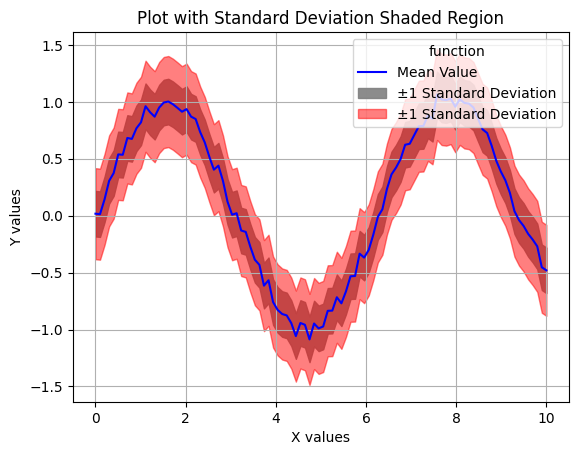

In [56]:
x = np.linspace(0, 10, 100)
# Example mean values (a sine wave with some noise)
y_mean = np.sin(x) + np.random.randn(len(x)) * 0.05
# Example standard deviation values (can be constant or vary along x)
y_std = np.full_like(y_mean, 0.2) # constant std dev of 0.2

# Calculate upper and lower bounds
y_upper_bound = y_mean + y_std
y_lower_bound = y_mean - y_std
y_upper_bound2 = y_mean + 2*y_std
y_lower_bound2 = y_mean - 2*y_std

# Plot the mean line
plt.plot(x, y_mean, color='blue', label='Mean Value')

# Use fill_between to shade the standard deviation area
plt.fill_between(x, y_lower_bound, y_upper_bound, color='gray', alpha=0.9, label='±1 Standard Deviation')
plt.fill_between(x, y_lower_bound2, y_upper_bound2, color='r', alpha=0.5, label='±1 Standard Deviation')

# Add labels, legend, and title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plot with Standard Deviation Shaded Region")
plt.legend(loc='upper right', title='function')
plt.grid(True)


### Multiple plots in the same figure

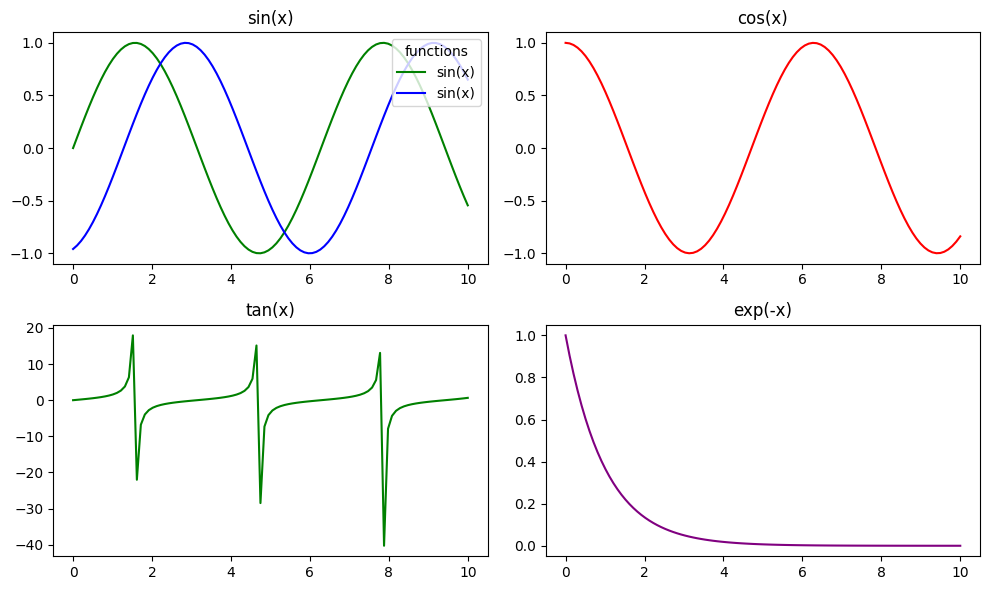

In [59]:
x = np.linspace(0, 10, 100)

# Create a figure with 4 subplots arranged in a 2x2 grid
# figsize is in inches by default, we can change the units too by multiplying with
# scaling factors.
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2 rows, 2 columns

# First subplot: sin(x)
axes[0, 0].plot(x, np.sin(x), label='sin(x)', color='g')
axes[0, 0].plot(x, np.sin(x+5) , label='sin(x)', color='b')
axes[0, 0].set_title("sin(x)")

axes[0,0].legend(loc="upper right", title ="functions")

# Second subplot: cos(x)
axes[0, 1].plot(x, np.cos(x), color='red')
axes[0, 1].set_title("cos(x)")

# Third subplot: tan(x)
axes[1, 0].plot(x, np.tan(x), color='green')
axes[1, 0].set_title("tan(x)")

# Fourth subplot: exp(-x)
axes[1, 1].plot(x, np.exp(-x), color='purple')
axes[1, 1].set_title("exp(-x)")

fig.tight_layout()

In [17]:
# Above same plot using pandas

# Create a pandas DataFrame with the sine, cosine, and tangent values
df = pd.DataFrame({
    "sin(x)": np.sin(x),
    "cos(x)": np.cos(x),
    "tan(x)": np.tan(x),
    "exp(-x)": np.exp(-x)
}, index=x)

df.head()

,sin(x),cos(x),tan(x),exp(-x)
0.00000,0.000000,1.000000,0.000000,1.000000
0.10101,0.100838,0.994903,0.101355,0.903924
0.20202,0.200649,0.979663,0.204814,0.817078
0.30303,0.298414,0.954437,0.312660,0.738577
0.40404,0.393137,0.919480,0.427564,0.667617


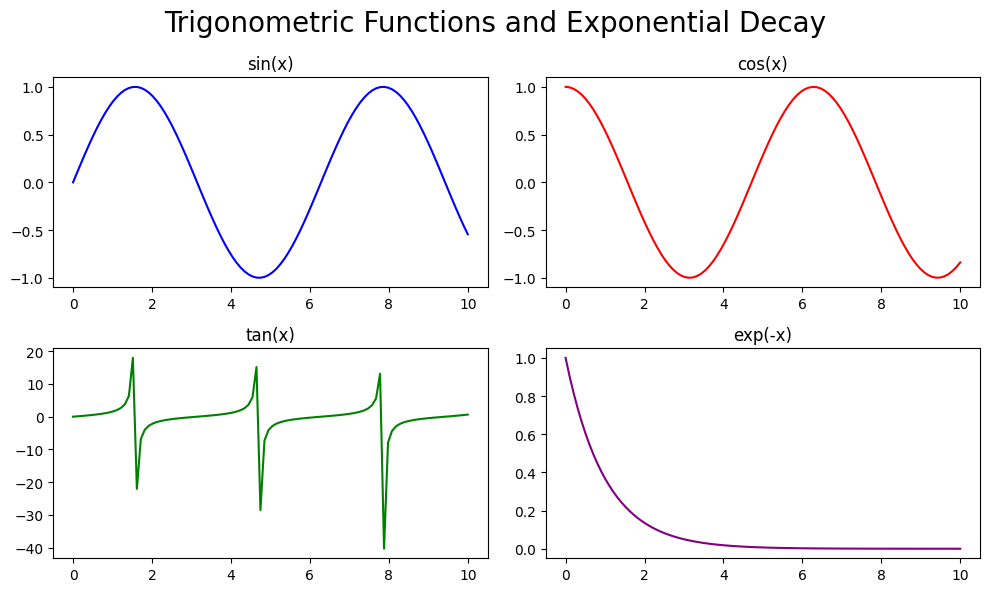

In [18]:
# Create a figure with 4 subplots arranged in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2 rows, 2 columns

# Plot each column of the DataFrame on a separate subplot
df["sin(x)"].plot(ax=axes[0, 0], color='blue', title="sin(x)")
df["cos(x)"].plot(ax=axes[0, 1], color='red', title="cos(x)")
df["tan(x)"].plot(ax=axes[1, 0], color='green', title="tan(x)")
df["exp(-x)"].plot(ax=axes[1, 1], color='purple', title="exp(-x)")

# Add super title to the figure
fig.suptitle("Trigonometric Functions and Exponential Decay", fontsize=20)

fig.tight_layout()

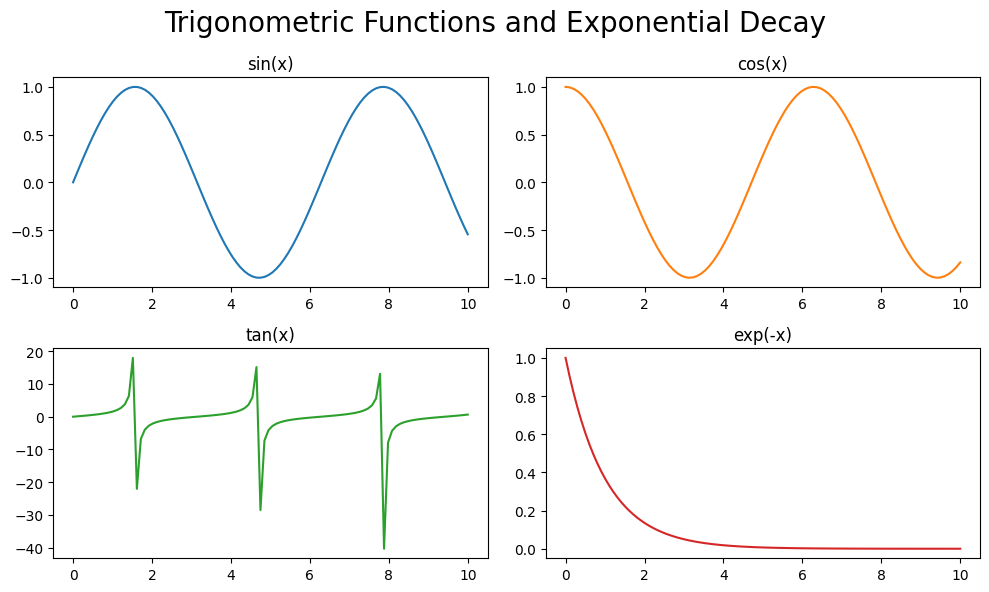

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

df.plot(subplots=True, ax=axes, figsize=(10, 6),
         title=["sin(x)", "cos(x)", "tan(x)", "exp(-x)"]
         ,legend=False)


# Add super title to the figure
fig.suptitle("Trigonometric Functions and Exponential Decay", fontsize=20)

fig.tight_layout()

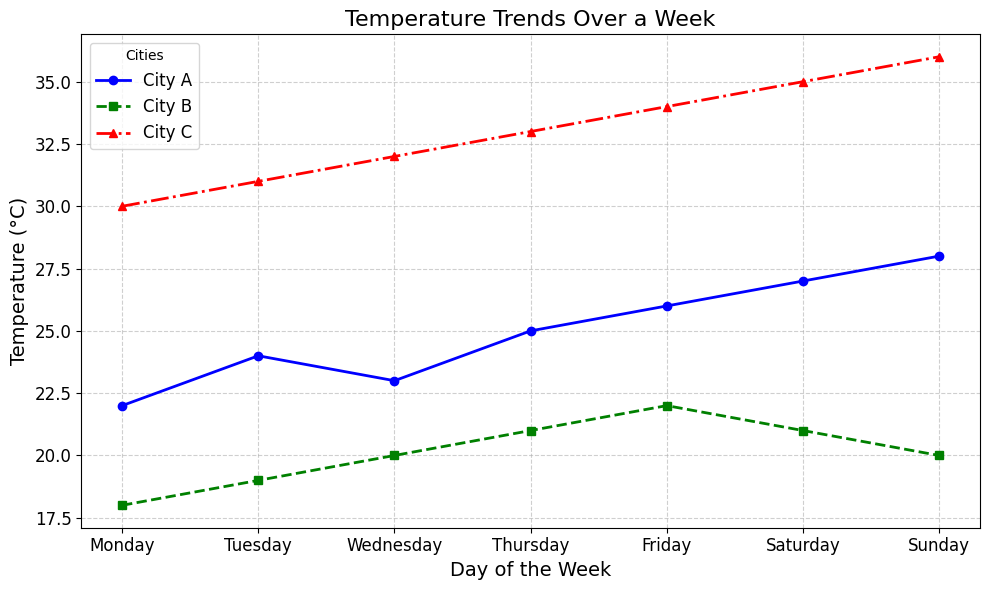

In [20]:
## Other Tweakings


# Daily temperature variations (in °C) over a week
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
city_a = [22, 24, 23, 25, 26, 27, 28]  # City A temperatures
city_b = [18, 19, 20, 21, 22, 21, 20]  # City B temperatures
city_c = [30, 31, 32, 33, 34, 35, 36]  # City C temperatures

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot trends with customizations
ax.plot(days, city_a, color='blue', linestyle='-', linewidth=2, marker='o', label='City A')
ax.plot(days, city_b, color='green', linestyle='--', linewidth=2, marker='s', label='City B')
ax.plot(days, city_c, color='red', linestyle='-.', linewidth=2, marker='^', label='City C')

# Add title and labels
ax.set_title("Temperature Trends Over a Week", fontsize=16)
ax.set_xlabel("Day of the Week", fontsize=14)
ax.set_ylabel("Temperature (°C)", fontsize=14)

# Customize ticks
ax.set_xticks(days)  # Use day names for x-axis
ax.tick_params(axis='both', which='major', labelsize=12)

# Add legend
ax.legend(fontsize=12, title="Cities")

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()

### Saving the plots

In [21]:
# Save the plot as a PNG file
fig.savefig("temperature_variations.png", dpi=300, bbox_inches='tight')

# Save the plot as a PDF file
fig.savefig("temperature_variations.pdf", dpi=300, bbox_inches='tight')

# Save the plot as an SVG file
fig.savefig("temperature_variations.svg", dpi=300, bbox_inches='tight')

## Other plots types


Let us download some data. Check how the data looks like

In [22]:
url = "https://raw.githubusercontent.com/seandhan/Used-Car-Price-Prediction/refs/heads/main/data/cleaned_used_cars_data.csv"
## bash commands in the notebook
!wget -q https://raw.githubusercontent.com/seandhan/Used-Car-Price-Prediction/refs/heads/main/data/cleaned_used_cars_data.csv
!head -n 5 cleaned_used_cars_data.csv

car_name,car_age,car_make,car_model,car_spec,engine,fuel_type,kilometers_driven,location,mileage,mileage_unit,owner_type,power,price,region,seats,transmission,year
AMBASSADOR CLASSIC,16,AMBASSADOR,CLASSIC,NOVA DIESEL,1489.0,Diesel,80000,Chennai,12.8,kmpl,Third,35.5,1.35,South,5.0,Manual,2003
AUDI A3,5,AUDI,A3,35 TDI ATTRACTION,1968.0,Diesel,79271,Chennai,20.38,kmpl,First,143.0,16.5,South,5.0,Automatic,2014
AUDI A3,2,AUDI,A3,35 TDI TECHNOLOGY,1968.0,Diesel,22000,Delhi,20.38,kmpl,Second,143.0,22.5,North,5.0,Automatic,2017
AUDI A3,3,AUDI,A3,35 TDI PREMIUM,1968.0,Diesel,20003,Mumbai,20.38,kmpl,First,143.0,19.25,West,5.0,Automatic,2016


Checking documentation

In [23]:
Data = pd.read_csv(url)
Data.head()

,car_name,car_age,car_make,car_model,car_spec,engine,fuel_type,kilometers_driven,location,mileage,mileage_unit,owner_type,power,price,region,seats,transmission,year
0,AMBASSADOR CLASSIC,16,AMBASSADOR,CLASSIC,NOVA DIESEL,1489.0,Diesel,80000,Chennai,12.80,kmpl,Third,35.5,1.35,South,5.0,Manual,2003
1,AUDI A3,5,AUDI,A3,35 TDI ATTRACTION,1968.0,Diesel,79271,Chennai,20.38,kmpl,First,143.0,16.50,South,5.0,Automatic,2014
2,AUDI A3,2,AUDI,A3,35 TDI TECHNOLOGY,1968.0,Diesel,22000,Delhi,20.38,kmpl,Second,143.0,22.50,North,5.0,Automatic,2017
3,AUDI A3,3,AUDI,A3,35 TDI PREMIUM,1968.0,Diesel,20003,Mumbai,20.38,kmpl,First,143.0,19.25,West,5.0,Automatic,2016
4,AUDI A3,3,AUDI,A3,35 TDI PREMIUM PLUS,1968.0,Diesel,39000,Mumbai,20.38,kmpl,First,143.0,18.90,West,5.0,Automatic,2016


### Bar plots

In [24]:
# Count occurrences of each fuel type
fueltype_counts = Data['fuel_type'].value_counts()
fueltype_counts

,count
fuel_type,
Diesel,3205
Petrol,2745
CNG,56
LPG,10


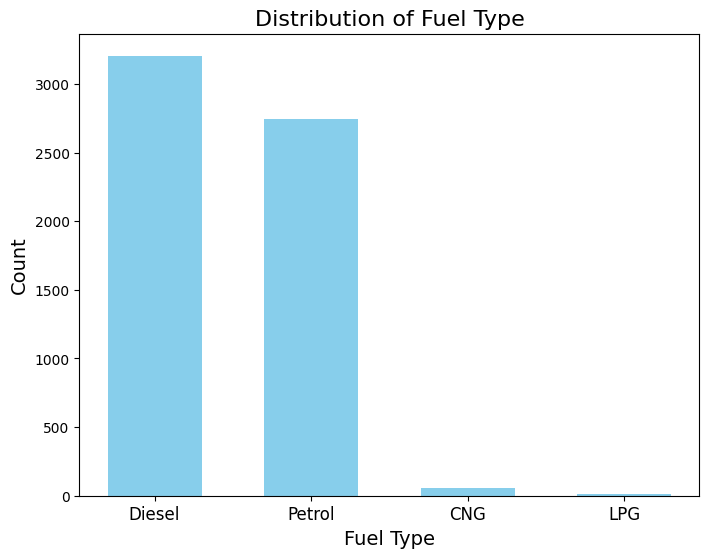

In [25]:
# Parameters for bar color and width
bar_color = ['skyblue']  # Example color list, you can change it to any color you prefer
bar_width = 0.6

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(fueltype_counts.index, fueltype_counts.values, color=bar_color, width=bar_width)

ax.set_title('Distribution of Fuel Type', fontsize=16)
ax.set_xlabel('Fuel Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticks(range(len(fueltype_counts.index)))
ax.set_xticklabels(fueltype_counts.index, fontsize=12)
# ax.set_yscale('log')

plt.show()

<Axes: title={'center': 'Distribution of Fuel Type'}, xlabel='Fuel Type', ylabel='Count'>

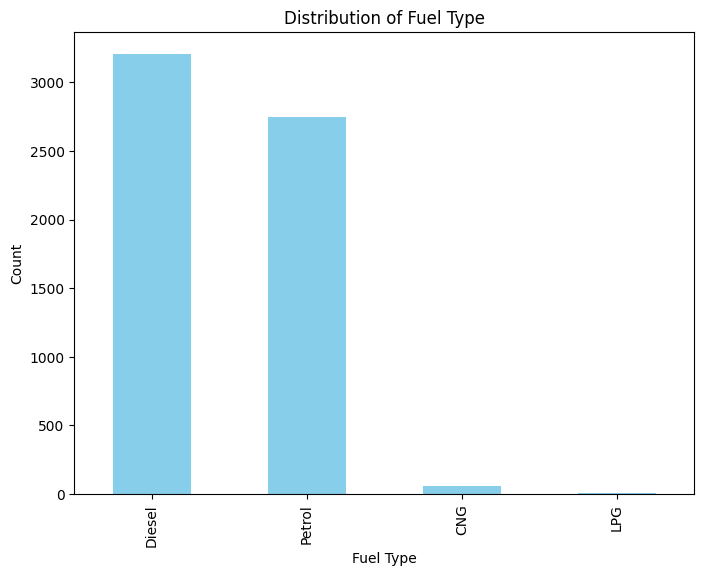

In [26]:
# In pandas
fueltype_counts.plot(kind='bar', color='skyblue',
                     figsize=(8, 6),
                     xlabel='Fuel Type', ylabel='Count'
                     , title='Distribution of Fuel Type')

### Scatterplot

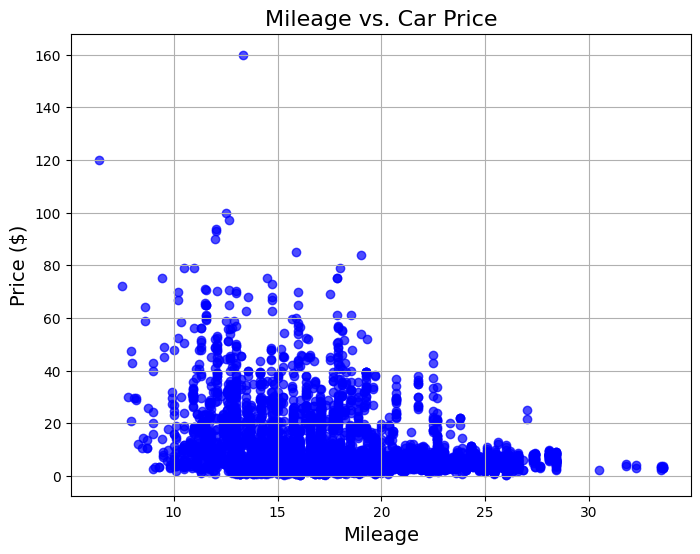

In [27]:
x = Data['mileage']
y = Data['price']

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, color='blue', alpha=0.7)

ax.set_title('Mileage vs. Car Price', fontsize=16)
ax.set_xlabel('Mileage', fontsize=14)
ax.set_ylabel('Price ($)', fontsize=14)

ax.grid(True)

### Pie chart

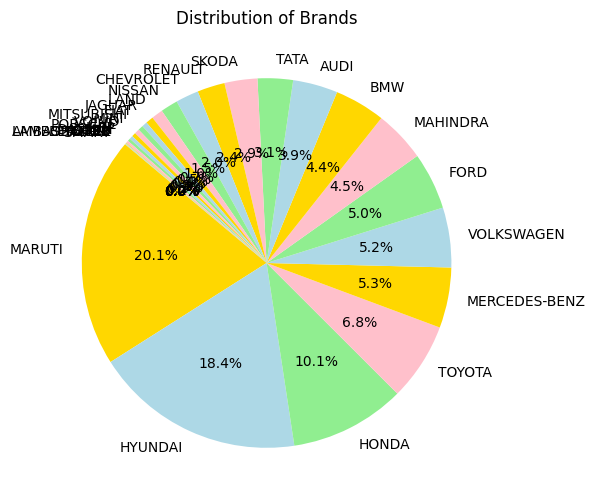

In [28]:
# Count occurrences of each brands
brand_counts = Data['car_make'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))

sizes = brand_counts.values
labels = brand_counts.index
colors = ['gold', 'lightblue', 'lightgreen', 'pink']  # Adjust colors as needed

ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

ax.set_title("Distribution of Brands")

plt.show()

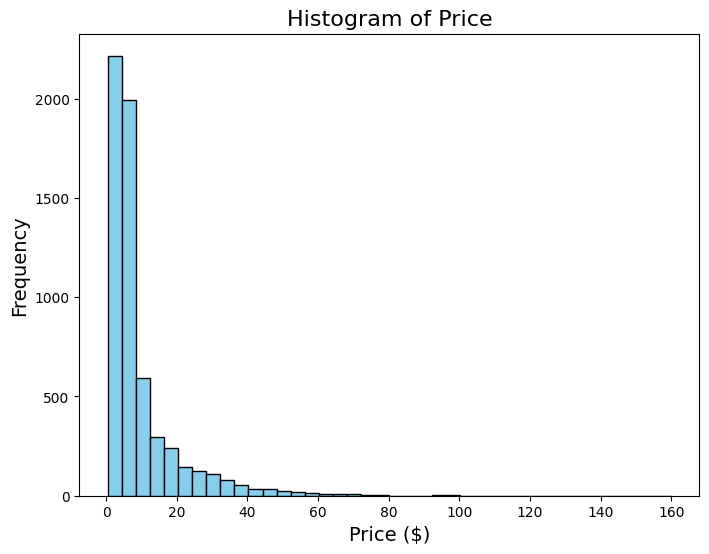

In [29]:


fig, ax = plt.subplots(figsize=(8, 6))

data = Data['price']

ax.hist(data, bins=40, color='skyblue', edgecolor='black')

ax.set_title('Histogram of Price', fontsize=16)
ax.set_xlabel('Price ($)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

plt.show()

## Show Image like data using imshow

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample data
data = np.random.rand(10, 10)

pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9
0,0.114721,0.228971,0.349905,0.738213,0.669617,0.623745,0.369411,0.159862,0.416130,0.915664
1,0.729735,0.571537,0.619104,0.186136,0.711289,0.165242,0.126135,0.763006,0.651530,0.940618
2,0.590928,0.389376,0.989341,0.937349,0.376113,0.586919,0.323027,0.991195,0.275333,0.572485
3,0.123910,0.237986,0.160383,0.074261,0.454233,0.137168,0.052659,0.399726,0.692486,0.604814
4,0.450897,0.848046,0.122199,0.626751,0.943752,0.425046,0.191481,0.427865,0.363302,0.709185
5,0.102127,0.126772,0.403587,0.178925,0.920010,0.446418,0.356899,0.176575,0.165824,0.265577
6,0.005227,0.120074,0.500617,0.405860,0.889204,0.819465,0.620790,0.346287,0.254603,0.006871
7,0.618285,0.265989,0.726009,0.140805,0.360228,0.403100,0.838639,0.629505,0.639692,0.821295
8,0.254461,0.161186,0.085270,0.287414,0.459280,0.992561,0.822801,0.066665,0.048781,0.752345
9,0.216372,0.751605,0.975026,0.216848,0.830785,0.848886,0.550933,0.940189,0.222091,0.953261


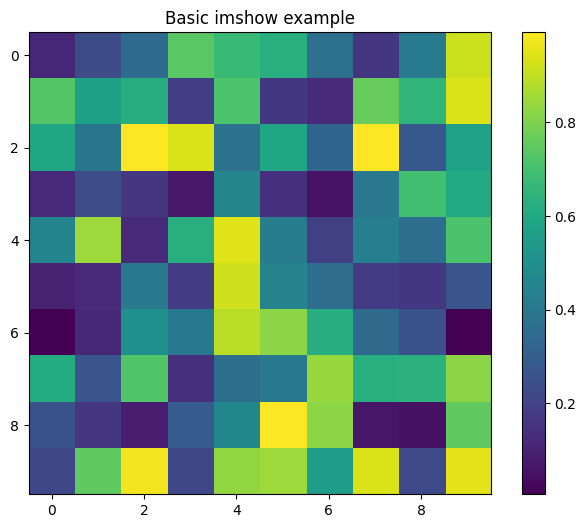

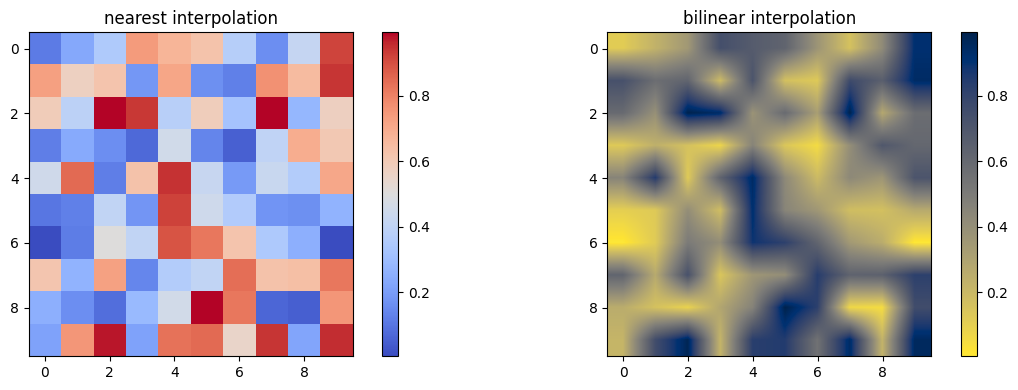

In [58]:


# Basic imshow example
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(data, cmap='viridis')
fig.colorbar(im, ax=ax)
ax.set_title('Basic imshow example')

# Multiple imshow with different interpolations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
im1 = ax1.imshow(data, interpolation='nearest', cmap='coolwarm')
ax1.set_title('nearest interpolation')
fig.colorbar(im1, ax=ax1)

im2 = ax2.imshow(data, interpolation='bilinear', cmap='cividis_r')
ax2.set_title('bilinear interpolation')
fig.colorbar(im2, ax=ax2)
fig.tight_layout()